In [8]:
import numpy as np
import sklearn.datasets as ds
import sklearn.cross_validation
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [642]:
digits = ds.load_digits()
X=digits['images']
y=digits['target']
digits.data[2].shape


(64L,)

In [63]:
import sklearn.ensemble as en
import sklearn.tree as tr
tr1 = tr.DecisionTreeClassifier()


In [65]:
import sklearn.cross_validation as c_v
score = c_v.cross_val_score(tr1,digits.data,y,cv=10)
score.mean()
def wr1(answer):
    #answers = [wll_0, wll_1, wll_2, wll_0r, wll_1r, wll_10, wll_11]
    with open("Trees_answer1.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answer]))
wr1(np.asarray([score.mean()]))


In [58]:
cl = en.BaggingClassifier(n_estimators=100)
cl.fit(digits.data,y)
sc2 = c_v.cross_val_score(cl,digits.data,y,cv=10)

In [59]:
 
def wr2(ans):
    with open("Trees_answer2.txt", "w") as fout:
        fout.write(str(ans))
def wr3(ans):
    with open("Trees_answer3.txt", "w") as fout:
        fout.write(str(ans))
def wr4(ans):
    with open("Trees_answer4.txt", "w") as fout:
        fout.write(str(ans))
def wr5(ans):
    with open("Trees_answer5.txt", "w") as fout:
        fout.write(str(ans))
wr2(sc2.mean())
print sc2.mean()

0.925481986681


In [67]:
print np.sqrt(digits.data.shape[1])
cl_root = en.BaggingClassifier(n_estimators=100,max_features= 8)
cl_root.fit(digits.data,y)
sc3 = c_v.cross_val_score(cl_root,digits.data,y,cv=10)
print sc3.mean()        
wr3(sc3.mean())

8.0
0.931017330797


In [643]:
tr2=tr.DecisionTreeClassifier(max_features='sqrt')
cl_4 = en.BaggingClassifier(base_estimator=tr2,n_estimators=100)
cl_4.fit(digits.data,y)
sc4 = c_v.cross_val_score(cl_4,digits.data,y,cv=10)
print sc4.mean()        
wr4(sc4.mean())

0.952172780187


In [644]:
forest =en.RandomForestClassifier(max_features='sqrt')
sc5 = c_v.cross_val_score(forest,digits.data,y,cv=10)
sc5.mean()


0.92119960811655233

In [645]:
feat =np.arange(2,64,3)
i=0
cv=30
scores = np.zeros((feat.size,cv))
for val in feat:
    forest =en.RandomForestClassifier(max_features=val)
    scores[i] = c_v.cross_val_score(forest,digits.data,y,cv=cv)

    i=i+1


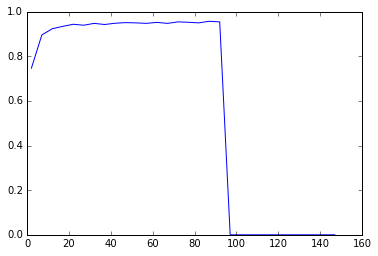

In [648]:
plt.plot(feat,scores.mean(1))

In [647]:
feat =np.arange(2,150,5)
i=0
cv=10
scores = np.zeros((feat.size,cv))
for val in feat:
    forest =en.RandomForestClassifier(max_features=8,n_estimators=val)
    scores[i] = c_v.cross_val_score(forest,digits.data,y,cv=cv)

    i=i+1

KeyboardInterrupt: 

In [ ]:
plt.plot(feat,scores.mean(1))

In [ ]:
feat =np.arange(2,60,2)
i=0
cv=10
scores = np.zeros((feat.size,cv))
for val in feat:
    forest =en.RandomForestClassifier(max_features=8,max_depth=val)
    scores[i] = c_v.cross_val_score(forest,digits.data,y,cv=cv)

    i=i+1
    

In [ ]:
plt.plot(feat,scores.mean(1))

In [652]:
forest =en.RandomForestClassifier(max_features=7,max_depth=30,n_estimators=130)
forest_my =en.RandomForestClassifier(max_features=7,max_depth=30,n_estimators=130)
a= c_v.cross_val_score(forest,digits.data,y,cv=cv)
a.mean()

0.95501170730924989

In [655]:
xp = np.array([0,0,6,15,15,4,0,0,
            0,0,4,0,3,15,1,0,
            0,0,0,0,0,15,0,0,
            0,0,0,0,2,15,0,0,
            0,0,0,15,15,7,0,0,
            0,0,0,0,6,14,0,0,
            0,15,8,5,15,6,0,0,
            0,6,15,15,6,0,0,0])
forest.fit(digits.data,y)
forest.predict_proba(xp)

C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.01538462,  0.04615385,  0.1       ,  0.49230769,  0.00769231,
         0.1       ,  0.        ,  0.10769231,  0.08461538,  0.04615385]])

In [656]:
from PIL import Image


In [657]:
import cv2
im = cv2.imread("test.png")
im.mean(2)
test = np.ones((8,8))*16-((im)/16).mean(2) - 1
print test
#print digits.data[98].reshape(8,8)
test =   test.reshape(64)

[[  0.   0.   0.   0.  15.  15.  15.   0.]
 [  0.   0.   0.   0.   0.   0.  15.   0.]
 [  0.   0.   0.   0.  15.  15.   0.   0.]
 [  0.   0.   0.  15.  15.  15.   0.   0.]
 [  0.   0.   0.   0.   0.  15.   0.   0.]
 [  0.   0.   0.   0.  15.  15.   0.   0.]
 [ 15.   0.  15.   0.   0.  15.   0.   0.]
 [  0.   0.  15.  15.  15.  15.   0.   0.]]


In [658]:
res =forest.predict(test)
print res
print forest.predict_proba(test)[0][res]
print forest.predict_proba(test)

[3]
[ 0.34615385]
[[ 0.02307692  0.18461538  0.05384615  0.34615385  0.00769231  0.08461538
   0.00769231  0.01538462  0.06923077  0.20769231]]


C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [659]:
digits.labels.shape

AttributeError: labels

In [660]:
im = cv2.imread("myhand.png")

print im.shape
test = np.ones((550,250))*32-((im)/8).mean(2) - 1
print test[2]

(550L, 250L, 3L)
[ 2.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  1.  1.  2.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  

In [661]:
def flat_for(a, f):
    a = a.reshape(-1)
    for i, v in enumerate(a):
        a[i] = f(v)
X=np.ones((220,25,25))
s=0
flat_for(test,(lambda x: int(x)))

for i in np.arange(0,test.shape[0],25):
    for j in np.arange(0,test.shape[1],25):
        X[s] = test[i:(i+25),j:(j+25)]
        s=s+1
        #print test[i:(i+25),j:j+25].shape,X[s].shape
print X.shape
y= np.array([np.arange(0,10) for i in np.arange(0,22)])




(220L, 25L, 25L)


In [662]:
X = X.reshape(220,625)
y= y.reshape(220)
score = c_v.cross_val_score(forest_my,X,y,cv=10)

In [663]:
score.mean()

0.68833333333333335

In [665]:
forest_my.fit(X,y)
n=58
print forest_my.predict(X[n])
print forest_my.predict_proba(X[n])


[8]
[[ 0.01538462  0.          0.02307692  0.02307692  0.00769231  0.06923077
   0.06923077  0.02307692  0.73846154  0.03076923]]


C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\pc\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [666]:
res = np.array([cv2.resize(v.reshape(25,25),(8,8))*8 for v in X[:]])
#print cv2.resize(res,(8,8))
cv2.imwrite('out.png',res[2],);
pd.DataFrame(res[2])

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.46875
1,0.0,0.0,0.0,0.00000,0.00000,42.40625,9.09375,6.09375
2,0.0,0.0,0.0,0.00000,64.56250,248.00000,248.00000,8.84375
3,0.0,0.0,0.0,0.00000,25.71875,241.37500,20.62500,7.50000
4,0.0,0.0,0.0,122.87500,149.56250,4.18750,0.00000,3.28125
5,0.0,0.0,0.0,96.78125,172.78125,85.00000,163.78125,11.34375
6,0.0,0.0,0.0,0.00000,1.50000,3.46875,0.00000,1.40625
7,7.5,7.5,7.5,3.28125,7.50000,7.50000,7.50000,8.00000


In [670]:
print forest.predict(res.reshape(220,64))
forest_my.predict(X)

[1 1 1 7 9 7 7 7 7 1 4 1 1 2 9 4 1 7 4 1 4 4 2 1 9 1 4 7 1 4 4 6 1 1 9 5 1
 7 7 1 1 4 6 1 1 1 1 7 7 1 7 2 1 1 1 7 1 4 7 7 4 6 1 2 1 1 1 7 7 1 8 4 7 2
 1 7 1 7 7 1 5 1 2 1 1 1 7 7 7 1 4 6 7 1 1 7 1 1 7 1 7 5 6 4 9 1 7 7 8 6 7
 7 1 7 1 7 7 7 7 1 4 2 2 1 1 1 8 1 1 1 7 4 1 2 1 8 6 1 1 1 1 8 1 2 1 1 1 1
 1 8 4 0 4 1 2 7 0 9 4 4 1 7 6 2 1 1 1 3 7 8 7 7 8 1 3 2 4 1 4 1 6 6 6 8 9
 8 1 4 7 1 6 8 3 2 9 7 1 8 2 1 9 6 6 4 3 8 8 9 9 0 1 1 1 3 1 8 1 9 8 1]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])